### PDF model of HSC differentiation on continuum cell state space 
Inputs:
   T: final time 
   ntest: choose single-cell data set 
        = 0 - Nestorowa data / 1 - Paul data 
   nAML : choose AML condition 
        = INF - normal condition / integer number - AML condition at nAML 

###### Load scRNA-seq data 

In [21]:
filename = 'Nestorowa2016_scRNAseqData.mat'; 
load( filename ); 
ntest = 0; 

###### Dimension Reduction 

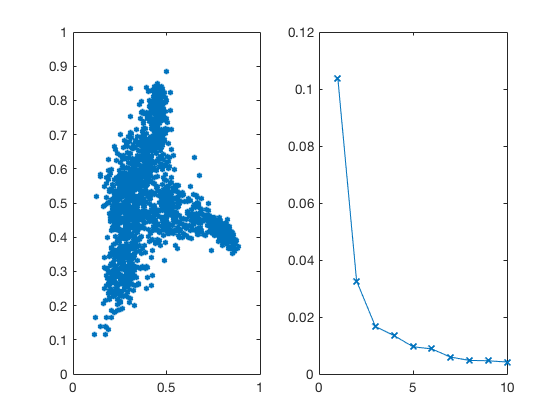

In [30]:
[dc, dcSig] = DiffusionMap_wNewData( data', [], 10, 0.5, Inf );
dc = dc_normalize(dc, 10);    % Normalize Diffusion Component to [0 1]
save( filename, 'dc', 'dcSig' ,'-append' ) 
figure; subplot( 1, 2, 1 ); f1=plot( dc(:,1), dc(:,2), 'o', 'markersize', 3); set(f1, 'markerfacecolor', get(f1, 'color'));xlim( [0 1] ); ylim( [0 1]); xlabel('DC1'); ylabel('DC2')
subplot( 1, 2, 2 ); plot( dcSig, '-x' )

###### PDE grid and differentiation matrix 

In [23]:
N = [100 125]; 
Compute_systemMatrix( N ); 

###### Compute homeostasis distribution 

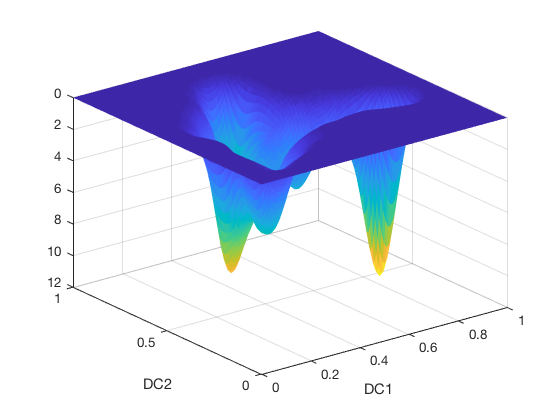

In [41]:
global N1 dx xx yy 
[YY,XX] = meshgrid(yy,xx); 
[uHS,~,~] = ksdensity( [dc(:,1:2)], [XX(:),YY(:)], 'bandwidth', [0.03 0.03] );
uHS = reshape( uHS, N1(1), N1(2) ); 
figure; surf( XX, YY, uHS, 'linestyle','none' ); set(gca, 'Zdir', 'reverse'); xlabel('DC1'); ylabel('DC2'); 

###### Compute PDE coefficients by Interpolation 

In [ ]:
Compute_systemCoeff( ntest, uHS ); 

###### Solve PDE in Normal condition 

In [ ]:
% Set Initial Condition 
% Solve PDE with RK 

In [ ]:
uinit = IC_2Dsp( 0.1, uHS*0.05, ntest ); 
uinit = BC_2Dsp( uinit );
Time_Integ_RK4( @Compute_du_2Dsp, @BC_2Dsp, uinit, T, dt, Tstep ) 

###### Solve PDE in AML condition - 1

###### Solve PDE in AML condition - 2